# Building structured multi-plot grids

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style='ticks')

## Conditional small multiples

当您希望在数据集的子集内分别可视化变量的分布或多变量之间的关系时，FacetGrid类非常有用。

In [3]:
tips = sns.load_dataset('tips')

#### 使用数据集初始化FacetGrid类，但不会在图上画任何东西

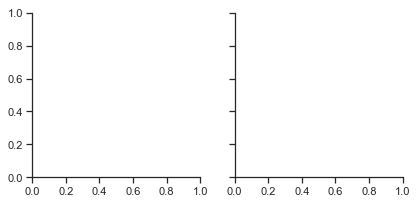

In [4]:
g = sns.FacetGrid(tips, col="time")

在gird可视化数据的最主要的方法是FacetGrid.map()，通过画图函数和
DataFrame中变量的名字我们就可以作图，例如：

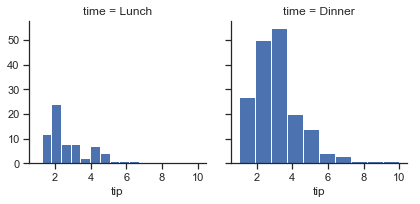

In [5]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

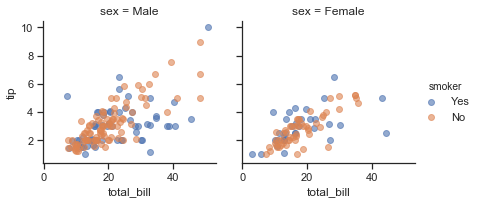

In [6]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.6)
g.add_legend();

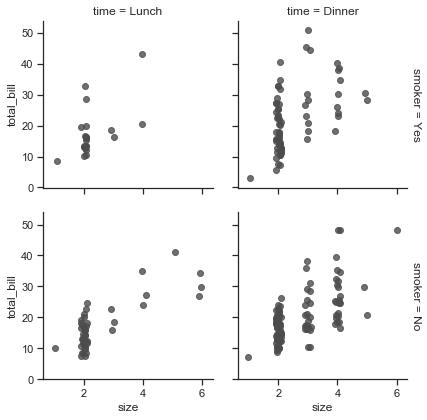

In [7]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

D:\Program Files (x86)\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


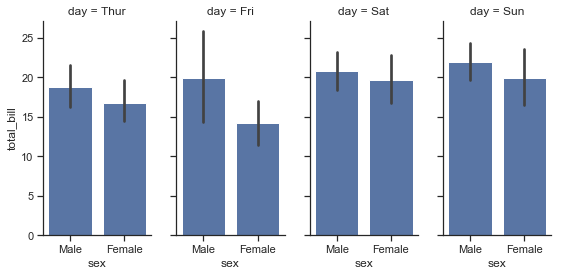

In [8]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

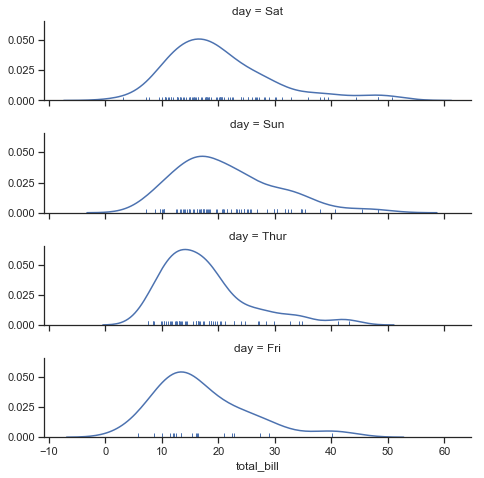

In [9]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

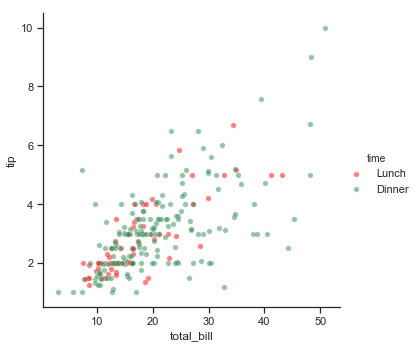

In [10]:
pal = dict(Lunch="red", Dinner="seagreen")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", 
      s=30, alpha=.5, linewidth=.5, edgecolor='white')
g.add_legend();

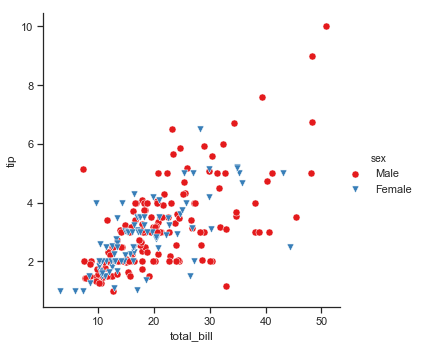

In [11]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", 
                  height=5, hue_kws={"marker":['o', 'v']})
g.map(plt.scatter, "total_bill", "tip", s=50, linewidth=.5, edgecolor='white')
g.add_legend();

D:\Program Files (x86)\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


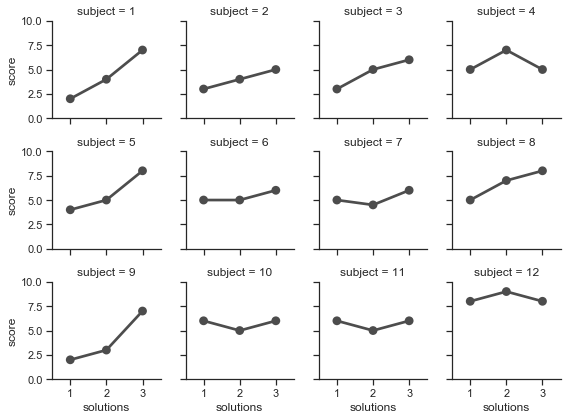

In [15]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

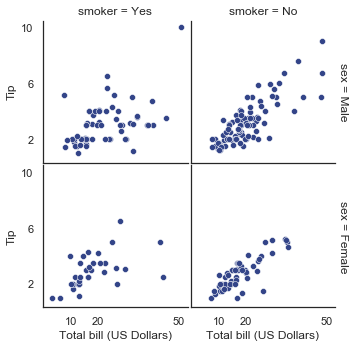

In [18]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True,
                      height=2.5)
g.map(plt.scatter, "total_bill", "tip", color='#334488',
    edgecolor="white", lw=.5)
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 20, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

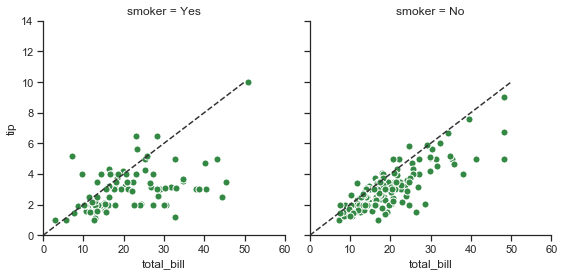

In [19]:
g = sns.FacetGrid(tips, col='smoker', margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color='#338844',
      edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 *50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

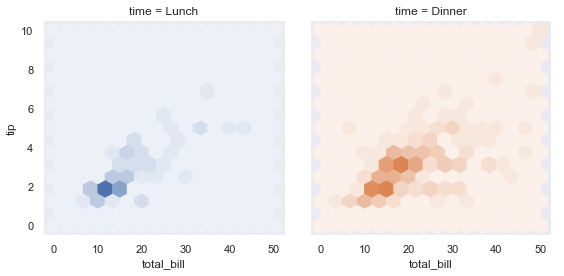

In [20]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

## Plotting pairwise data relationships

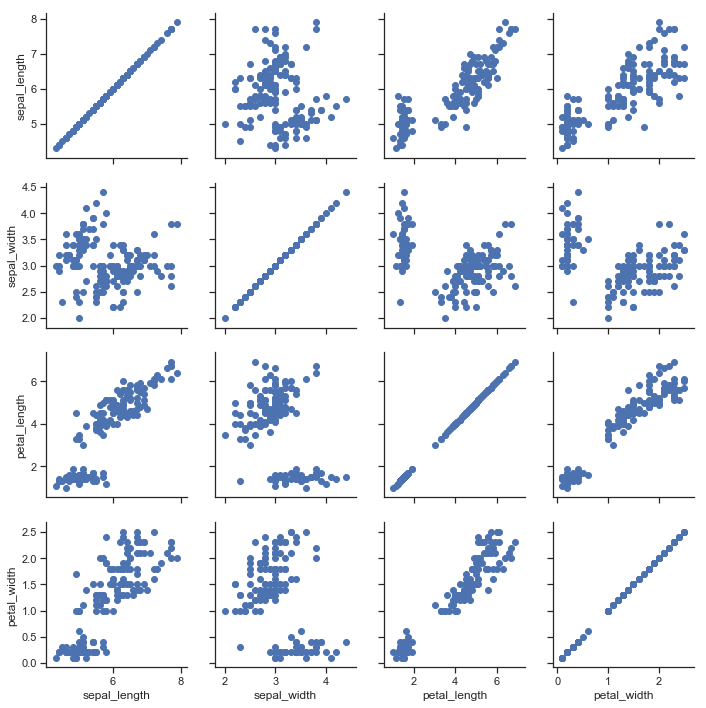

In [22]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

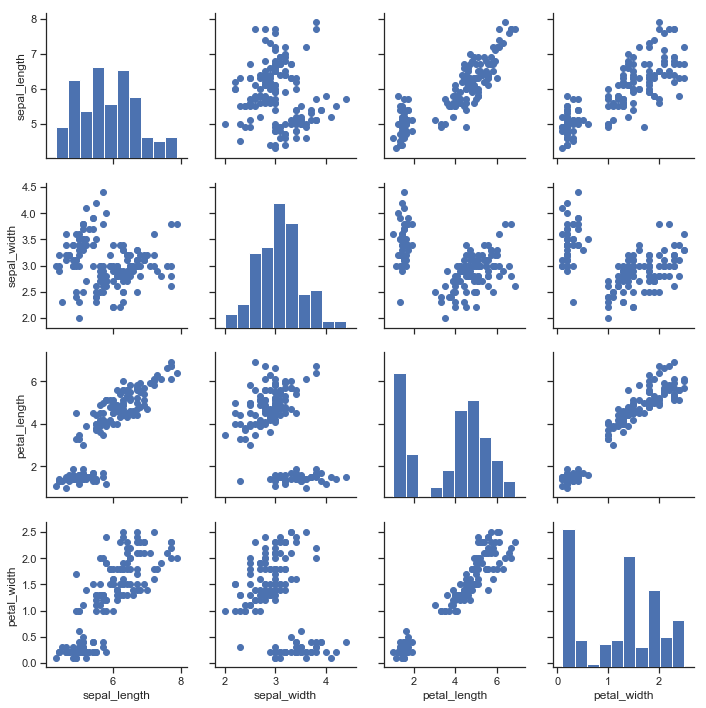

In [23]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

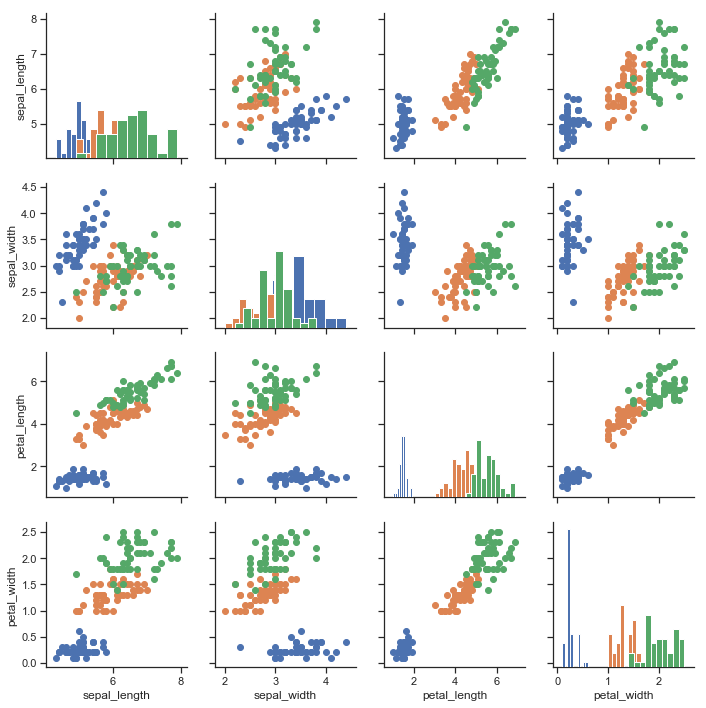

In [24]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

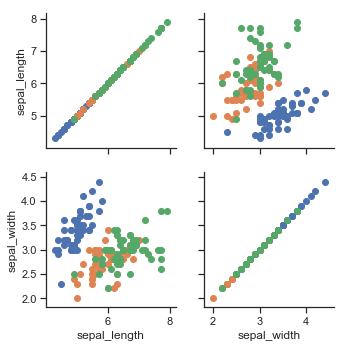

In [25]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

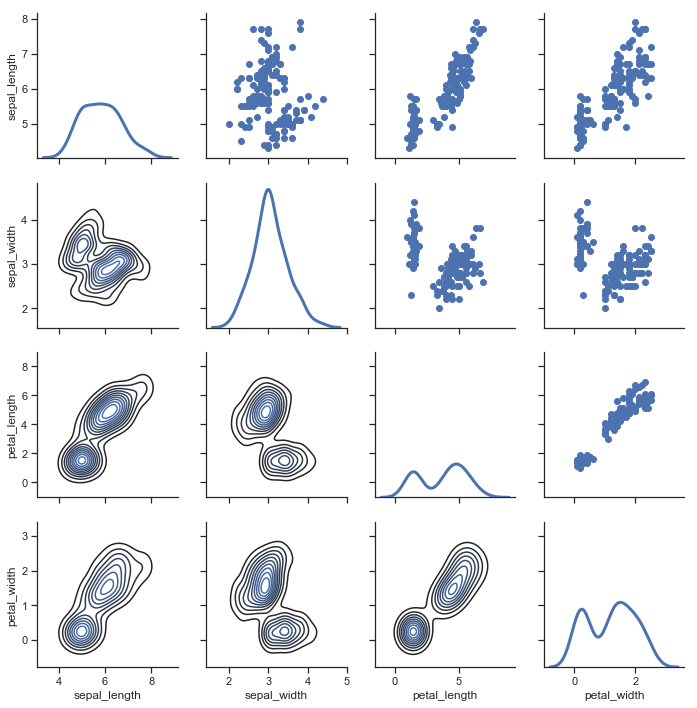

In [27]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

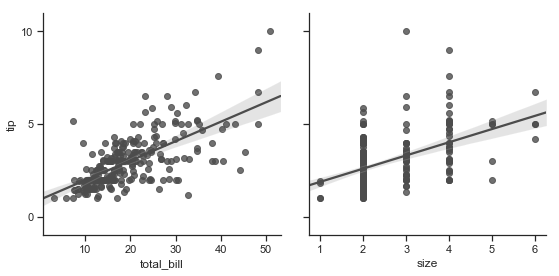

In [30]:
g = sns.PairGrid(tips, y_vars=["tip"], 
                 x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

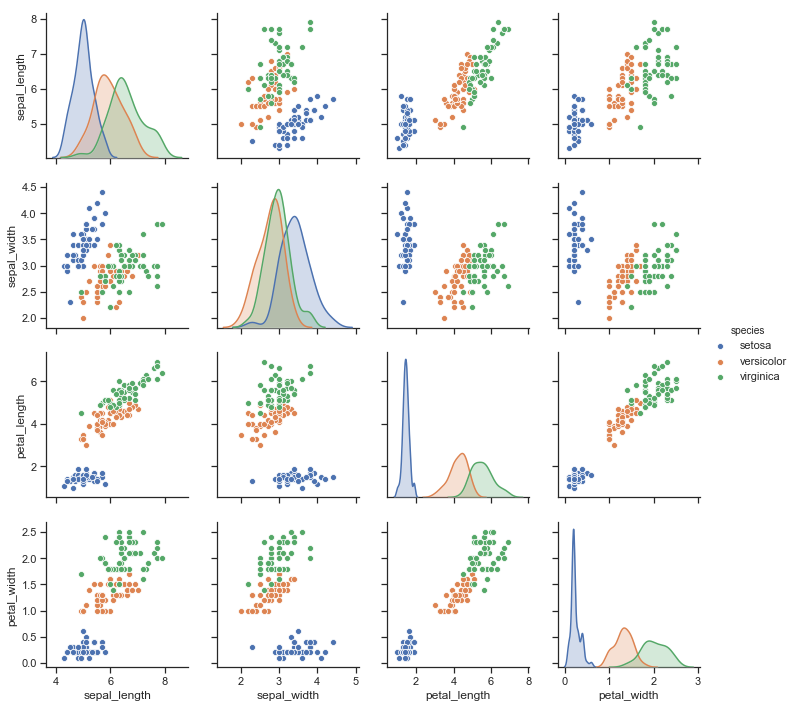

In [31]:
sns.pairplot(iris, hue='species', height=2.5);

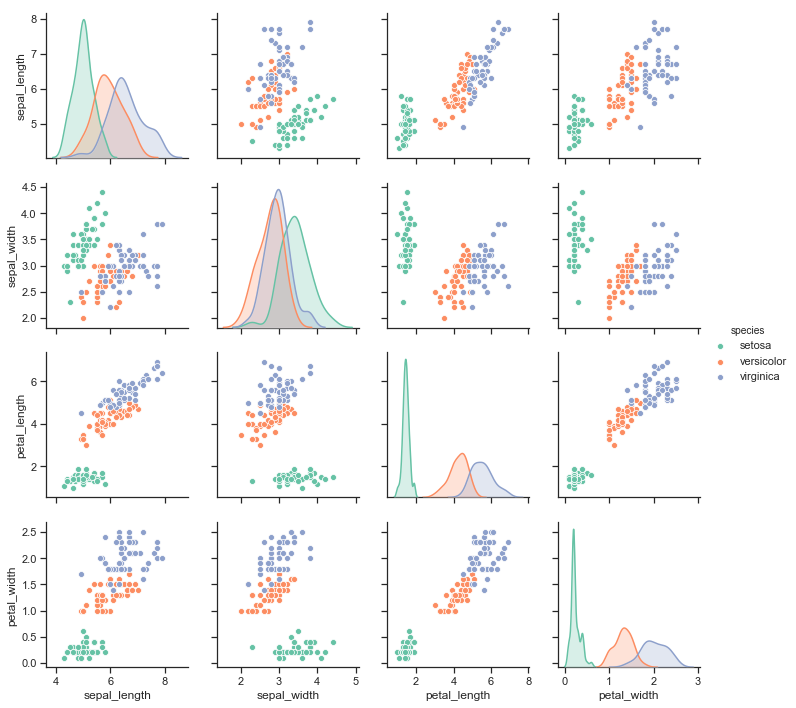

In [32]:
sns.pairplot(iris, hue='species', palette="Set2", height=2.5);